In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14564946170657815334
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5748293632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7503600089838047013
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
# Import necessary modules
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.datasets import cifar10
from keras.utils import to_categorical


# Load CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print(train_labels.shape, test_labels.shape)

(50000, 10) (10000, 10)


In [3]:
# AlexNet model architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Fully Connected layer
model.add(Flatten())
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [4]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# model.fit(train_images, train_labels, epochs=5, 
#           validation_data=(test_images, test_labels))

history = model.fit(train_images, train_labels, epochs=90, 
                    validation_data=(test_images, test_labels))

Epoch 1/90
1563/1563 [==============================] - 17s 9ms/step - loss: 1.8552 - accuracy: 0.3299 - val_loss: 1.6438 - val_accuracy: 0.4145
Epoch 2/90
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5753 - accuracy: 0.4448 - val_loss: 1.5312 - val_accuracy: 0.4634
Epoch 3/90
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4664 - accuracy: 0.4918 - val_loss: 1.4168 - val_accuracy: 0.5099
Epoch 4/90
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3893 - accuracy: 0.5267 - val_loss: 1.3244 - val_accuracy: 0.5456
Epoch 5/90
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3160 - accuracy: 0.5547 - val_loss: 1.2902 - val_accuracy: 0.5518
Epoch 6/90
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2574 - accuracy: 0.5764 - val_loss: 1.2555 - val_accuracy: 0.5682
Epoch 7/90
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2033 - accuracy: 0.5953 - val_loss: 1.3624 - val_a

1563/1563 [==============================] - 17s 11ms/step - loss: 0.1180 - accuracy: 0.9742 - val_loss: 1.5326 - val_accuracy: 0.6289
Epoch 58/90
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1144 - accuracy: 0.9758 - val_loss: 1.8101 - val_accuracy: 0.5763
Epoch 59/90
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1127 - accuracy: 0.9755 - val_loss: 1.6169 - val_accuracy: 0.5970
Epoch 60/90
1563/1563 [==============================] - 16s 11ms/step - loss: 0.1051 - accuracy: 0.9777 - val_loss: 1.4900 - val_accuracy: 0.6223
Epoch 61/90
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1055 - accuracy: 0.9778 - val_loss: 1.4652 - val_accuracy: 0.6345
Epoch 62/90
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1024 - accuracy: 0.9787 - val_loss: 1.4502 - val_accuracy: 0.6384
Epoch 63/90
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1076 - accuracy: 0.9760 - val_loss: 1.5440 - val_ac

In [5]:
#cifar10

accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])


313/313 [==============================] - 1s 3ms/step - loss: 1.8764 - accuracy: 0.5949
Test loss: 1.8763736486434937
Test accuracy: 0.5949000120162964


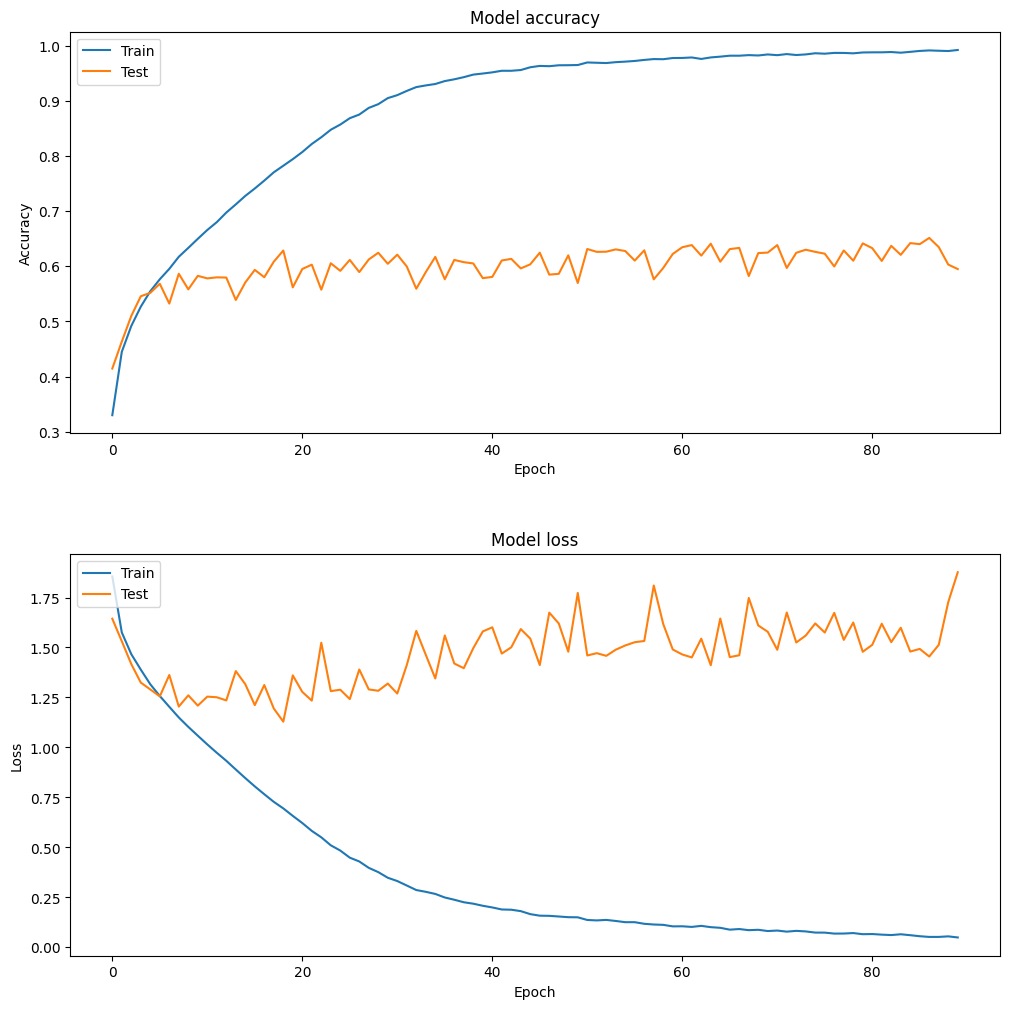

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplots_adjust(hspace=0.3)
plt.show()